In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,TimeDistributed,Dropout, BatchNormalization, LayerNormalization,Bidirectional
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import json
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
qna_dataset=pd.read_csv("Network-QA-Dataset.csv")

In [44]:
def read_file(path):
    with open(path, 'r', encoding='utf-8') as f:
        str_text=f.read().lower()
    return str_text


In [ ]:
text=read_file("./four_days.txt")

In [46]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [47]:
# Create input sequences
input_sequences = []

for line in text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences


array([[  0,   0,   0, ...,   0,  61,  62],
       [  0,   0,   0, ...,  61,  62, 106],
       [  0,   0,   0, ...,  62, 106,  63],
       ...,
       [  0,   0,   0, ..., 105,  68,   4],
       [  0,   0,   0, ...,  68,   4, 658],
       [  0,   0,   0, ...,   4, 658, 659]], dtype=int32)

In [48]:
# Split into features and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.eye(total_words)[y]  # One-hot encode output
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:

# Step 2: Build the LSTM Model
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len-1),
    LSTM(150, return_sequences=True),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.build(input_shape=(None, max_sequence_len-1)) 

c:\Users\Zeeshan Ali\Desktop\NLP Practice\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 460, 100)       │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 460, 150)       │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 660)            │        66,660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,660 (1.46 MB)

 Trainable params: 383,660 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Step 3: Train the Model
history=model.fit(X, y, epochs=300, verbose=1)

model.save("model.keras")


Epoch 1/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.0285 - loss: 6.3272
Epoch 2/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 424ms/step - accuracy: 0.0517 - loss: 5.7003
Epoch 3/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.0495 - loss: 5.6797
Epoch 4/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 0.0465 - loss: 5.6827
Epoch 5/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.0417 - loss: 5.6559
Epoch 6/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 427ms/step - accuracy: 0.0445 - loss: 5.4884
Epoch 7/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.0492 - loss: 5.3737
Epoch 8/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.0624 - loss: 5.2711
Epoch 9/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.0651 - loss: 5.1499
Epoch 10/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - accuracy: 0.0566 - loss: 5.1448
Epoch 11/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 429ms/step - accuracy: 0.0781 - loss: 4.9533
Epoch 12/300
52/52 ━━━━━━━━━━━

In [61]:
model = load_model("model.keras")

In [62]:
# Step 4: Predict Next Tokens
def predict_next_words(seed_text, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ''
        for word, index in tokenizer.word_index.items():

            if index == predicted:
                output_word = word
                break
        seed_text += ' ' + output_word
    return seed_text

# Example prediction
print(predict_next_words("The rest of his toilet", 5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The rest of his toilet was soon achieved and he


In [115]:
# Load QnA from JSON file
with open("qna.json", "r") as file:
    qna=json.load(file)
    qna_data = qna.get("QnA")

# Convert JSON to DataFrame
df = pd.DataFrame(qna_data)

In [116]:
df

,question,answer
0,Who is Queequeg?,Queequeg is a character in the novel 'Moby-Dic...
1,Why did Queequeg hug the narrator during sleep?,Queequeg hugged the narrator in his sleep out ...
2,What is the significance of the tattoo on Quee...,The tattoo on Queequeg's arm resembles a Creta...
3,What does the patchwork counterpane symbolize?,The patchwork counterpane symbolizes diversity...
4,How does the narrator feel upon waking up to Q...,The narrator feels a mixture of discomfort and...
5,What childhood memory does the narrator recall...,The narrator recalls a memory of being punishe...
6,What literary technique is used when describin...,The technique used is symbolism and metaphor. ...
7,What is the tone of the passage describing Que...,"The tone is humorous and light-hearted, as the..."
8,Why does the narrator compare Queequeg to both...,The narrator sees Queequeg as being in a trans...
9,What does the narrator admire about Queequeg d...,The narrator admires Queequegâ€™s innate sense...


In [117]:
# Preprocessing: Lowercase and remove special characters
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

In [118]:
df['question'] = df['question'].apply(preprocess)
df['answer'] = df['answer'].apply(preprocess)

In [119]:
# Splitting into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Hyperparameters
max_words = 10000
max_len = 100

# Tokenizer for questions and answers
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(pd.concat([df['question'], df['answer']]))

In [120]:
# Encoding and padding sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['question']), maxlen=max_len, padding='post')
y_train = pad_sequences(tokenizer.texts_to_sequences(train_df['answer']), maxlen=max_len, padding='post')

X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['question']), maxlen=max_len, padding='post')
y_val = pad_sequences(tokenizer.texts_to_sequences(val_df['answer']), maxlen=max_len, padding='post')


In [121]:
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 313


In [122]:
# Expand dimensions to fit LSTM requirements
y_train = np.expand_dims(y_train, -1)
y_val = np.expand_dims(y_val, -1)


In [123]:
# LSTM Model
model = Sequential([
    Embedding(vocab_size, 256, input_length=max_len),  # Increased embedding size
    LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),  # First LSTM layer
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),  # Second LSTM layer
    LSTM(64, return_sequences=True, dropout=0.3),  # Third LSTM layer
    TimeDistributed(Dense(128, activation='relu')),  # Fully connected layer with time distribution
    Dropout(0.4),  # Dropout after dense layer
    TimeDistributed(Dense(vocab_size, activation='softmax'))  # Final output layer
])


model.build(input_shape=(None, max_len-1)) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



c:\Users\Zeeshan Ali\Desktop\NLP Practice\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 99, 256)        │        80,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 99, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 99, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 99, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 99, 128)        │         8,320 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 99, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 99, 313)        │        40,377 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,665 (3.44 MB)

 Trainable params: 900,665 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32)

# Saving the model
model.save("qna_lstm_model.h5")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 5.0000e-04 - loss: 5.7439 - val_accuracy: 0.7720 - val_loss: 5.6983
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.2675 - loss: 5.6956 - val_accuracy: 0.7720 - val_loss: 5.5569
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5975 - loss: 5.5718 - val_accuracy: 0.7720 - val_loss: 5.3080
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.7010 - loss: 5.3796 - val_accuracy: 0.7720 - val_loss: 5.0831
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.7445 - loss: 5.1541 - val_accuracy: 0.7720 - val_loss: 4.8885
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.7705 - loss: 4.9467 - val_accuracy: 0.7720 - val_loss: 4.6789
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7785 - loss: 4.7409 - val_accuracy: 0.7720 - val_loss: 4.4450
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.7815 - loss: 4.5261 - val_accuracy: 0.7720 

In [131]:
def preprocess_question(question, tokenizer, max_len):
    seq = tokenizer.texts_to_sequences([question])  # Convert text to sequence
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')  # Pad sequence
    return padded_seq

# def predict_answer(question, tokenizer, max_len, model, index_to_word):
#     # Preprocess the question
#     input_seq = preprocess_question(question, tokenizer, max_len)
    
#     # Predict
#     predicted_seq = model.predict(input_seq)  # Shape: (1, max_len, vocab_size)
#     # Convert predicted tokens to words
#     predicted_words = [
#         index_to_word.get(np.argmax(word_probs), "<UNK>") for word_probs in predicted_seq[0]
#     ]
#     # Join words to form the answer
#     predicted_answer = ' '.join(predicted_words)
    
#     return predicted_answer



# question = "Who is Queequeg?"
# predicted_answer = predict_answer(question, tokenizer, max_len, model, index_to_word)
# print("Predicted Answer:", predicted_answer)

index_to_word = {index: word for word, index in tokenizer.word_index.items()}

def predict_answer(question, tokenizer, max_len, model, index_to_word):
    # Preprocess the question
    input_seq = preprocess_question(question, tokenizer, max_len)
    answer = []

    for _ in range(max_len):
        # Predict the next word
        predicted_probs = model.predict(input_seq, verbose=0)  # Shape: (1, max_len, vocab_size)
        
        # Get the last time step prediction (the final word in the sequence)
        predicted_token = np.argmax(predicted_probs[0, -1, :])
        
        # If the predicted token is padding or unknown, continue generating more words
        if predicted_token == 0:
            continue
        
        # Convert token to word and add to answer
        predicted_word = index_to_word.get(predicted_token, "<UNK>")
        answer.append(predicted_word)
        
        # Update the input sequence by shifting left and appending the predicted token
        input_seq = np.roll(input_seq, -1)  # Shift left
        input_seq[0, -1] = predicted_token  # Add the new token at the end

    return ' '.join(answer) if answer else "<No Prediction>"

# Example usage
question = "Who is Queequeg?"
predicted_answer = predict_answer(question, tokenizer, max_len, model, index_to_word)
print("Predicted Answer:", predicted_answer)



Predicted Answer: <No Prediction>


In [5]:
# new
df=pd.DataFrame(qna_dataset)

In [6]:
# Preprocessing: Lowercase and remove special characters
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

In [7]:
df['Questions'] = df['Questions'].apply(preprocess)
df['Answers'] = df['Answers'].apply(preprocess)

df= df[['Questions', 'Answers']]

In [8]:
questions = df["Questions"].tolist()
answers = df["Answers"].tolist()

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions + answers)
vocab_size = len(tokenizer.word_index) + 1

In [11]:
question_sequences = tokenizer.texts_to_sequences(questions)
answer_sequences = tokenizer.texts_to_sequences(answers)

max_sequence_length = max(max(len(seq) for seq in question_sequences), max(len(seq) for seq in answer_sequences))

padded_questions = pad_sequences(question_sequences, maxlen=max_sequence_length)
padded_answers = pad_sequences(answer_sequences, maxlen=max_sequence_length)

answer_one_hot = to_categorical(padded_answers, num_classes=vocab_size)

# 2. LSTM Model Architecture
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(max_sequence_length * vocab_size, activation='relu'))
model.add(tf.keras.layers.Reshape((max_sequence_length,vocab_size)))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Training
model.fit(padded_questions, answer_one_hot, epochs=10, validation_split=0.2)

# 4. Inference
def answer_question(question):
    question_seq = tokenizer.texts_to_sequences([question])
    padded_question = pad_sequences(question_seq, maxlen=max_sequence_length)
    prediction = model.predict(padded_question)
    predicted_seq = tf.argmax(prediction[0], axis=-1).numpy()
    answer_words = [tokenizer.index_word.get(idx, '') for idx in predicted_seq]
    return ' '.join(answer_words)

# Example usage
question = "What is the purpose of Section 23 in the document?"
answer = answer_question(question)
print(answer)

c:\Users\Zeeshan Ali\Desktop\NLP Practice\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10


: 

In [67]:
# Splitting into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Hyperparameters
max_words = 10000
max_len = 100

# Tokenizer for questions and answers
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(pd.concat([df['Questions'], df['Answers']]))

In [68]:
# Encoding and padding sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Questions']), maxlen=max_len, padding='post')
y_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Answers']), maxlen=max_len, padding='post')
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['Questions']), maxlen=max_len, padding='post')
y_val = pad_sequences(tokenizer.texts_to_sequences(val_df['Answers']), maxlen=max_len, padding='post')


In [69]:
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 3493


In [70]:
# Expand dimensions to fit LSTM requirements
y_train = np.expand_dims(y_train, -1)
y_val = np.expand_dims(y_val, -1)


In [72]:
# LSTM Model
model = Sequential([
    Embedding(vocab_size, 512, input_length=max_len),  # Increased embedding size
    Bidirectional(LSTM(256, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)),
    BatchNormalization(),
    LSTM(128, return_sequences=True, dropout=0.4, recurrent_dropout=0.4),
    LayerNormalization(),
    LSTM(128, return_sequences=True, dropout=0.3),
    BatchNormalization(),
    TimeDistributed(Dense(256, activation='relu')),
    Dropout(0.5),
    TimeDistributed(Dense(128, activation='relu')),
    Dropout(0.4),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

# Compile the model with a lower learning rate for better convergence
# Gradient Clipping
optimizer = Adam(learning_rate=0.001, clipvalue=1.0)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.build(input_shape=(None, max_len-1)) 


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 99, 512)        │     1,788,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 99, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 99, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 99, 128)        │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 99, 128)        │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 99, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 99, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 99, 256)        │        33,024 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 99, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 99, 128)        │        32,896 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 99, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 99, 3493)       │       450,597 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,342,437 (16.57 MB)

 Trainable params: 4,341,157 (16.56 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [73]:
# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[lr_scheduler, early_stopping]
)

# Saving the model
model.save("qna_lstm_model.keras")

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4091 - loss: 6.0595 - val_accuracy: 0.6315 - val_loss: 2.9431 - learning_rate: 0.0010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6122 - loss: 2.9523 - val_accuracy: 0.6315 - val_loss: 3.2079 - learning_rate: 0.0010
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6304 - loss: 2.7257 - val_accuracy: 0.6347 - val_loss: 2.8405 - learning_rate: 0.0010
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6291 - loss: 2.6857 - val_accuracy: 0.6378 - val_loss: 2.6902 - learning_rate: 0.0010
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6410 - loss: 2.6011 - val_accuracy: 0.6421 - val_loss: 2.6709 - learning_rate: 0.0010
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6413 - loss: 2.5991 - val_accuracy: 0.6462 - val_loss: 2.6968 - learning_rate: 0.0010
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6454 - loss: 2.5409 - val_accuracy: 

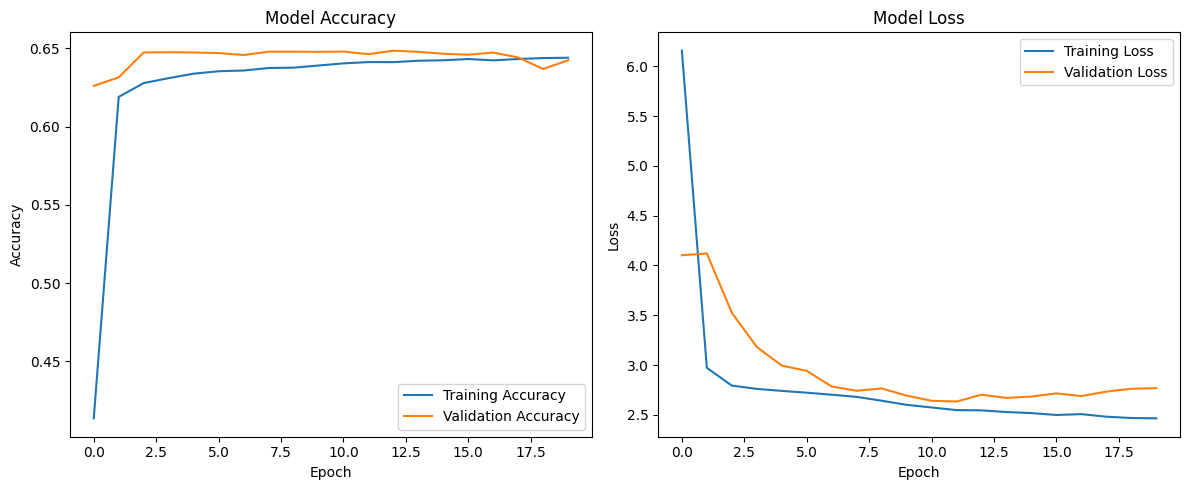

In [53]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [84]:
# Create index_to_word dictionary
index_to_word = {index: word for word, index in tokenizer.word_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<OOV>"

def preprocess_question(question, tokenizer, max_len):
    """Preprocess the input question to convert it into a padded sequence."""
    question = preprocess(question)  # Apply same preprocessing as training data
    seq = tokenizer.texts_to_sequences([question])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')
    return padded_seq

def predict_answer(question, tokenizer, max_len, model, index_to_word):
    """Predict answer for a given question."""
    input_seq = preprocess_question(question, tokenizer, max_len)
    answer = []
    max_answer_len = max_len  # Limit answer length
    
    for _ in range(max_answer_len):
        predicted_probs = model.predict(input_seq, verbose=0)
        predicted_token = np.argmax(predicted_probs[0, -1, :])
        print(np.argmax(predicted_probs[:,-1]))
        if predicted_token == 0:  # Stop at padding token
            break
            
        word = index_to_word.get(predicted_token, "<OOV>")
        if word == "<OOV>":  # Stop if we hit unknown word
            break
            
        answer.append(word)
        
        # Update input sequence
        input_seq = np.roll(input_seq, -1)
        input_seq[0, -1] = predicted_token
    
    return ' '.join(answer) if answer else "<No Prediction>"

# Example usage
question = "What is the purpose of the restoration indicators in the VLR?"
predicted_answer = predict_answer(question, tokenizer, max_len, model, index_to_word)
print("Predicted Answer:", predicted_answer)

0
Predicted Answer: <No Prediction>
